# Financial analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from relife import Gompertz, AgeReplacementPolicy, OneCycleAgeReplacementPolicy

In [2]:
a0 = np.array([15, 20, 25]).reshape(-1, 1)  # Ages initiaux des actifs
cp = 10  # Cout d'un rempalcement préventif
cf = np.array([900, 500, 100]).reshape(-1, 1)  # Cout d'un rempalcement sur défaillance
discounting_rate = 0.04  # taux d'actualisation

distribution = Gompertz(shape=0.00391, rate=0.0758)  # Modèle de durée de vie des actifs

# Remplacement par âge sur une infinité de cycles
ar_policy = AgeReplacementPolicy(
    distribution, cf=cf, a0=a0, cp=cp, discounting_rate=discounting_rate
)
ar_policy.fit(inplace=True)
ar_policy.ar1, ar_policy.ar

(array([[ 7.82608906],
        [ 9.06699905],
        [19.02758643]]),
 array([[20.91316269],
        [25.54310597],
        [41.59988035]]))

In [3]:
# Remplacement par âge sur un cycle
onecycle_ar_policy = OneCycleAgeReplacementPolicy(
    distribution, a0=a0, cf=cf, cp=cp, discounting_rate=discounting_rate
)
onecycle_ar_policy.fit(inplace=True)
onecycle_ar_policy.ar

array([[ 7.82608906],
       [ 9.06699905],
       [19.02758643]])

In [4]:
distrib = Gompertz(shape=0.2, rate=0.1)
distrib.mean(), distrib.var()

(array(14.93348747), np.float64(60.372106915294125))

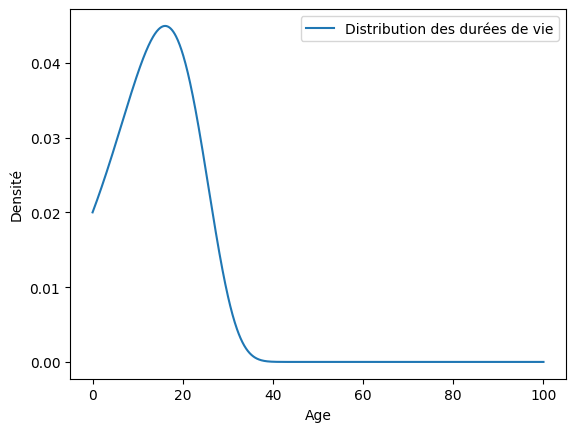

In [5]:
t = np.linspace(0, 100, num=1000)
ax = distrib.plot.pdf(t, label="Distribution des durées de vie")
ax.set_xlabel("Age")
ax.set_ylabel("Densité")
plt.show()

In [6]:
ar_policy = AgeReplacementPolicy(distrib, cf=cf, cp=cp, discounting_rate=discounting_rate)
ar_policy.fit(inplace=True)
optimal_ar = ar_policy.ar
print(optimal_ar)

[[3.11636797]
 [4.10385822]
 [8.61449029]]


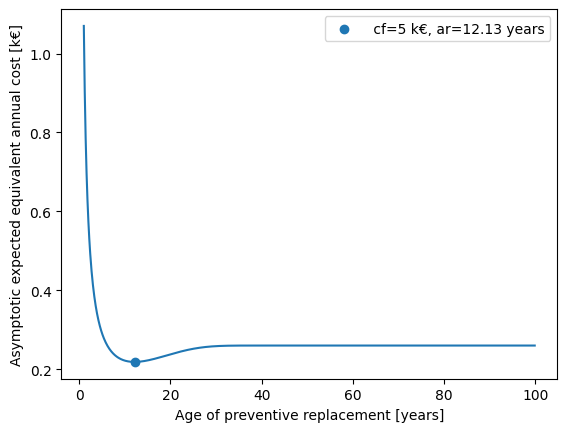

asymptotic expected equivalent annual cost with optimal ar : [[0.21905383]]


In [7]:
cp = 1
cf = 5
discounting_rate = 0.05

ar = np.arange(1, 100, 0.1).reshape(-1, 1)  # range of ar
ar_policy = AgeReplacementPolicy(
    distrib, cf=cf, cp=cp, ar=ar, discounting_rate=discounting_rate
)
za = ar_policy.asymptotic_expected_equivalent_annual_cost()
ar_policy.fit(inplace=True)
ar_opt = ar_policy.ar  # optimal ar
za_opt = ar_policy.asymptotic_expected_equivalent_annual_cost()
plt.plot(ar, za)
plt.scatter(ar_opt, za_opt, label=f" cf={cf} k€, ar={np.round(ar_opt, 2)} years")
plt.xlabel("Age of preventive replacement [years]")
plt.ylabel("Asymptotic expected equivalent annual cost [k€]")
plt.legend()
plt.show()
print("asymptotic expected equivalent annual cost with optimal ar :", za_opt)

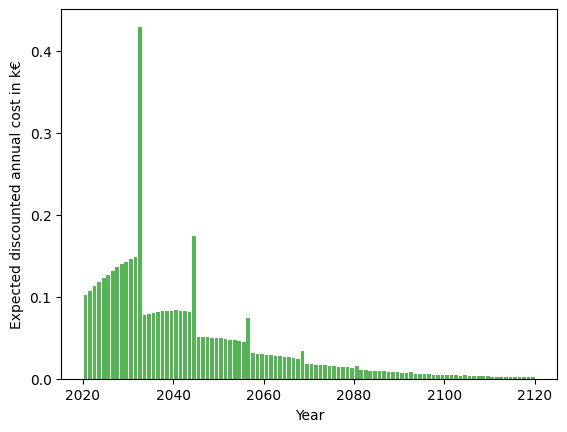

In [8]:
dt = 0.5
step = int(1 / dt)
t = np.arange(0, 100 + dt, dt)
z = ar_policy.expected_total_cost(t)
y = t[::step][1:]
q = np.diff(z[::step])
plt.bar(2020 + y, q, align="edge", width=-0.8, alpha=0.8, color="C2")
plt.xlabel("Year")
plt.ylabel("Expected discounted annual cost in k€")
plt.show()

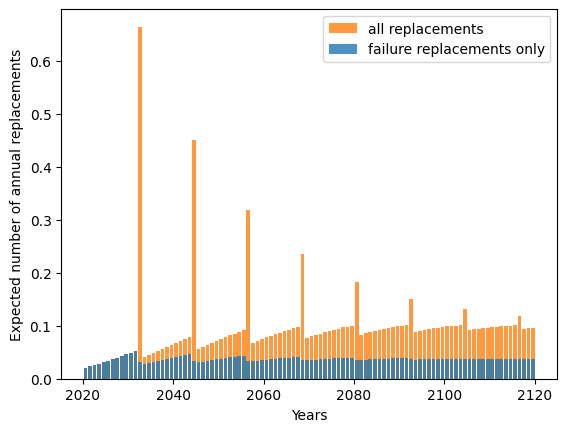

In [9]:
policya = AgeReplacementPolicy(distrib, cf=1, cp=1, ar=ar_opt, discounting_rate=0)
policyb = AgeReplacementPolicy(distrib, cf=1, cp=0, ar=ar_opt, discounting_rate=0)
mt = policya.expected_total_cost(t)
mf = policyb.expected_total_cost(t)
qt = np.diff(mt[::step])
qf = np.diff(mf[::step])
plt.bar(
    y + 2020,
    qt,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C1",
    label="all replacements",
)
plt.bar(
    y + 2020,
    qf,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C0",
    label="failure replacements only",
)
plt.xlabel("Years")
plt.ylabel("Expected number of annual replacements")
plt.legend()
plt.show()

[[0.25232943]]


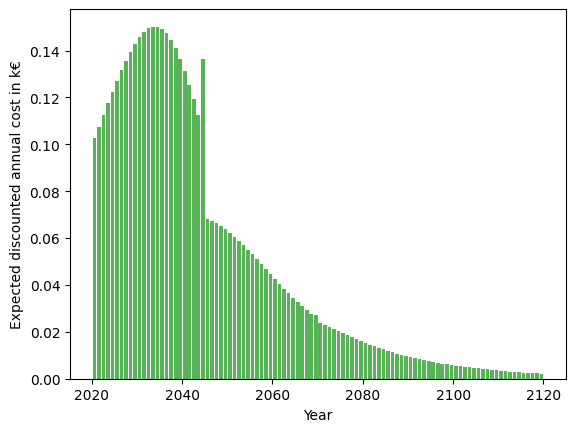

In [10]:
# Choix d'une stratégie de remplacement a priori, sans calcul d'optimalité.
ar = 25
# Projection des conséquences de la stratégie
sub_opti_ar_policy = AgeReplacementPolicy(
    distrib, cf=cf, cp=cp, ar=ar, discounting_rate=discounting_rate
)
# Cout de long terme de la stratégie
print(sub_opti_ar_policy.asymptotic_expected_equivalent_annual_cost())
# Distribution des coûts de la stratégie au cours du temps
dt = 0.5
step = int(1 / dt)
t = np.arange(0, 100 + dt, dt)
z = sub_opti_ar_policy.expected_total_cost(t)
y = t[::step][1:]
q = np.diff(z[::step])
plt.bar(2020 + y, q, align="edge", width=-0.8, alpha=0.8, color="C2")
plt.xlabel("Year")
plt.ylabel("Expected discounted annual cost in k€")
plt.show()

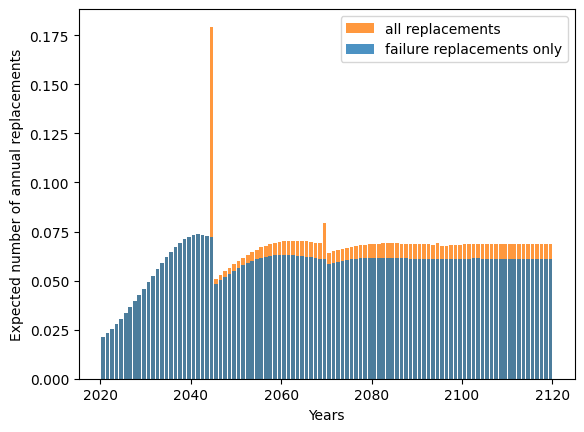

In [11]:
policya = AgeReplacementPolicy(distrib, cf=1, cp=1, ar=ar, discounting_rate=0)
policyb = AgeReplacementPolicy(distrib, cf=1, cp=0, ar=ar, discounting_rate=0)

# Distribution des remplacements de la stratégie au cours du temps
mt = policya.expected_total_cost(t)
mf = policyb.expected_total_cost(t)
qt = np.diff(mt[::step])
qf = np.diff(mf[::step])
plt.bar(
    y + 2020,
    qt,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C1",
    label="all replacements",
)
plt.bar(
    y + 2020,
    qf,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C0",
    label="failure replacements only",
)

plt.xlabel("Years")
plt.ylabel("Expected number of annual replacements")
plt.legend()
plt.show()